In [1]:
import pandas as pd
import numpy as np  
##from bertopic_modeling.bertopic_mapper import merge_and_process
import matplotlib.pyplot as plt
import seaborn as sns
#from plotting_utils import save_figure
#from ssl_data_transformers_robust import PreprocessingPipeline
#from lazy_predict_runner import LazyPredictPipeline
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.cm as cm


import matplotlib as mpl
import matplotlib.font_manager as font_manager

sns.set_style("whitegrid")

# Font settings
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = True

### Check the distributions etc for the labeled subset of the data after using BERTopic

In [3]:
# docs_topics = './data/categorized_topic_doc_neighbors_15_cluster_50_samples_5_topic_size_500_vol_2.csv'
# all_data = './data/processed_data_all_vol_2.csv'

In [4]:
# merge_and_process(docs_topics, all_data)

In [5]:
# df_bertopic = pd.read_csv('./data/processed_data_all_bertopic_vol_2.csv')

# # change dtype of category to string in df_bertopic
# df_bertopic['category'] = df_bertopic['category'].astype(str)

#### Checks

In [6]:
### Check with manually labelled subset whether bertopic is correct

# # display data with category different than '-1'
# df_check = df_bertopic[df_bertopic['category'] != '-1']
# # return rows for which category is not equal to categoty_bertopic
# df_check = (df_check[df_check['category'] != df_check['category_bertopic']])

# # return rows for whichi category_bertopic is not '-1'
# df_check = df_check[df_check['category_bertopic'] != '-1']
# df_check

Small fix - Overwrite category_bertopic with category (if category not equal to -1)

In [7]:
# replace 'category_bertopic' value with 'category' value if 'category' is not equal to '-1' 
# df_bertopic['category_bertopic'] = np.where(df_bertopic['category'] != '-1', df_bertopic['category'], df_bertopic['category_bertopic'])

In [8]:
# check row with prodict_id 9613414101	
# df_bertopic[df_bertopic['product_id'] == '9613414101']

In [9]:
# df_bertopic.to_csv('./data/processed_data_all_bertopic_vol_2.csv', index=False)

In [2]:
df_bertopic = pd.read_csv('/Users/annabzinkowska/DTU/master_thesis/00_data/processed_data_all_bertopic_vol_2.csv')

/var/folders/n9/qhmmsj1s7w52648j4cjf7ztc0000gn/T/ipykernel_62699/2798092652.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bertopic = pd.read_csv('/Users/annabzinkowska/DTU/master_thesis/00_data/processed_data_all_bertopic_vol_2.csv')


##### Split data into labelled and unlabelled

In [3]:
# only the data that has been categorized by bertopic
df_bertopic_labeled = df_bertopic[df_bertopic['category_bertopic'] != '-1']

# only the data that has not been categorized by bertopic
df_bertopic_unlabeled = df_bertopic[df_bertopic['category_bertopic'] == '-1']

In [4]:
len(df_bertopic_unlabeled)

17093

Class weights for the labelled data

In [12]:
# Convert the class labels to strings
df_bertopic_labeled['category_bertopic'] = df_bertopic_labeled['category_bertopic'].astype(str)

# Step 1: Define your target classes
classes = list(set(df_bertopic_labeled['category_bertopic']))

# Step 2: Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=df_bertopic_labeled['category_bertopic'])

# Step 3: Create a dictionary of class weights
class_weight_dict = dict(zip(classes, class_weights))

In [13]:
class_weight_dict

{'C': 0.27878589544301724,
 'E': 15.419004524886878,
 'A': 1.36140631242509,
 'D': 56.79333333333334,
 'B': 1.6777941900541604}

Decision boundaries for the labelled data

#### Subset to validate with stakeholders

In [14]:
df_bertopic_labeled['category_bertopic'].value_counts()

category_bertopic
C    12223
A     2503
B     2031
E      221
D       60
Name: count, dtype: int64

In [15]:
len(df_bertopic_labeled)

17038

Sample for validation with stakeholders

In [16]:
# take 30 random samples from each bertopic category
# df_bertopic_labeled_sample = df_bertopic_labeled.groupby('category_bertopic').apply(lambda x: x.sample(n=30, random_state=42)).reset_index(drop=True)

In [17]:
# drop columns from df_bertopic_labeled_sample expect for product_id, original_description, category_bertopic
# df_bertopic_labeled_sample = df_bertopic_labeled_sample[['product_id', 'description_original', 'category_bertopic']]

In [18]:
# df_bertopic_labeled_sample.to_csv('./data/processed_data_all_bertopic_labeled_sample_vol_2.csv', index=False)

### EDA

In [19]:
# display he count for each category_bertopic
df_bertopic['category_bertopic'].value_counts()

category_bertopic
-1    17093
C     12223
A      2503
B      2031
E       221
D        60
Name: count, dtype: int64

In [20]:
# sum of products with label different than '-1' (i.e. categorized by bertopic)
df_bertopic_labeled['category_bertopic'].value_counts().sum()

17038

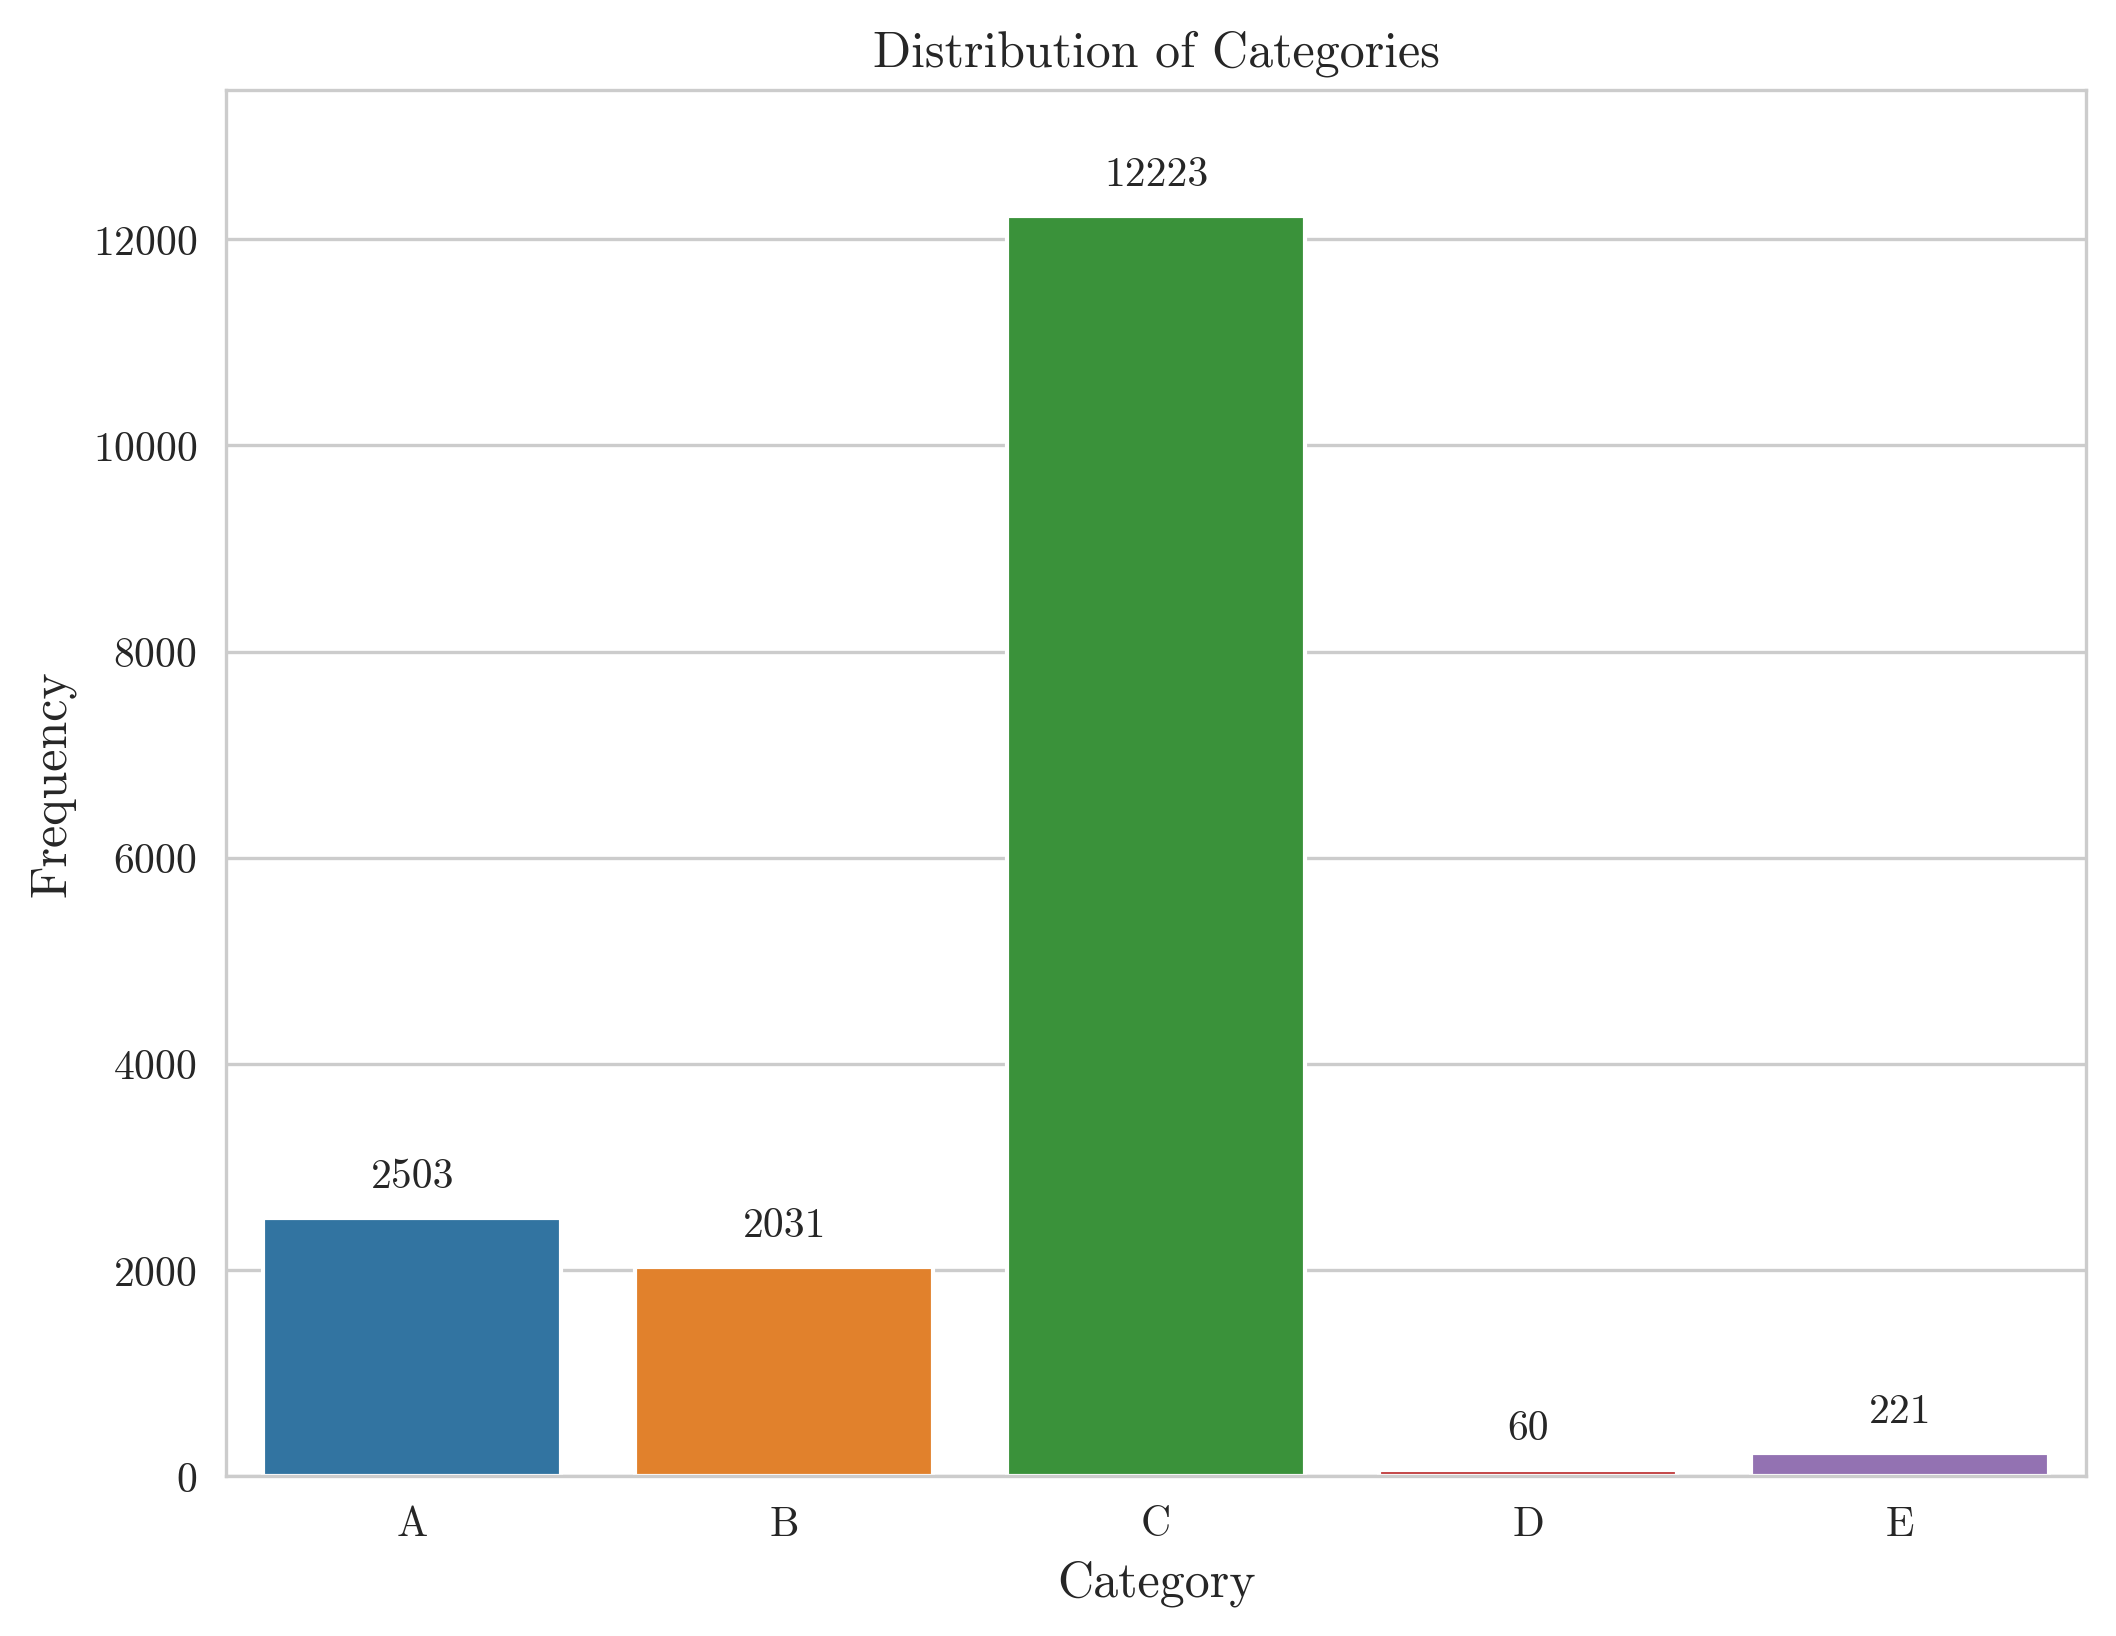

In [21]:
# Assuming 'df_bertopic_labeled' is a Pandas DataFrame and 'category_bertopic' is a column in that DataFrame
order = sorted(df_bertopic_labeled['category_bertopic'].unique())

# Set a larger figure size for better visibility
plt.figure(figsize=(8, 6), dpi = 300)

# Create the count plot with ordered categories
ax = sns.countplot(data=df_bertopic_labeled, x='category_bertopic', order=order)
plt.title('Distribution of Categories')

# Change x and y axis labels
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add counts on top of the bars
for p in ax.patches:
    height = int(p.get_height())  # Convert to integer
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),  # Adjust this value to move label position
                textcoords='offset points',
                fontsize=10)

# Adjust the ylim to fit the annotations and give some space above the tallest bar
ax.set_ylim(0, 1.1 * df_bertopic_labeled['category_bertopic'].value_counts().max())

# Save the figure using the provided function
# save_figure(plt.gcf(), 'bertopic_labeled_category_distribution')

# Show the plot
plt.show()


In [22]:
df_bertopic_labeled.describe()

month_mode  quarter_mode  year_mode  day_week_mode  quantity_sum  \
count    17038.00      17038.00   17038.00       17038.00      17038.00   
mean         5.79          2.23    2018.22           1.90       2776.58   
std          3.42          1.11       2.87           1.37      41573.83   
min          1.00          1.00    2014.00           0.00          5.00   
25%          3.00          1.00    2016.00           1.00          9.00   
50%          5.00          2.00    2018.00           2.00         30.00   
75%          9.00          3.00    2021.00           3.00        190.00   
max         12.00          4.00    2023.00           6.00    3430142.00   

        price_sum  unit_weight  customer_country_count  customer_id_count  \
count    17038.00     17038.00                17038.00           17038.00   
mean     78441.48        22.95                    7.50              11.06   
std     739016.19        50.96                    9.66              19.00   
min         50.12         0.00                    1.00               1.00   
25%       2528.92         0.12                    2.00               2.00   
50%      10883.53         1.06                    4.00               4.00   
75%      33935.41        18.82                    9.00              11.00   
max   69895000.00       816.80                   70.00             249.00   

       unit_price_mean    topic  
count         17038.00 17038.00  
mean           1216.47    26.47  
std            4247.45    37.39  
min               0.00    -1.00  
25%              29.47     1.00  
50%             220.51     6.00  
75%            1385.30    41.00  
max          178430.88   147.00

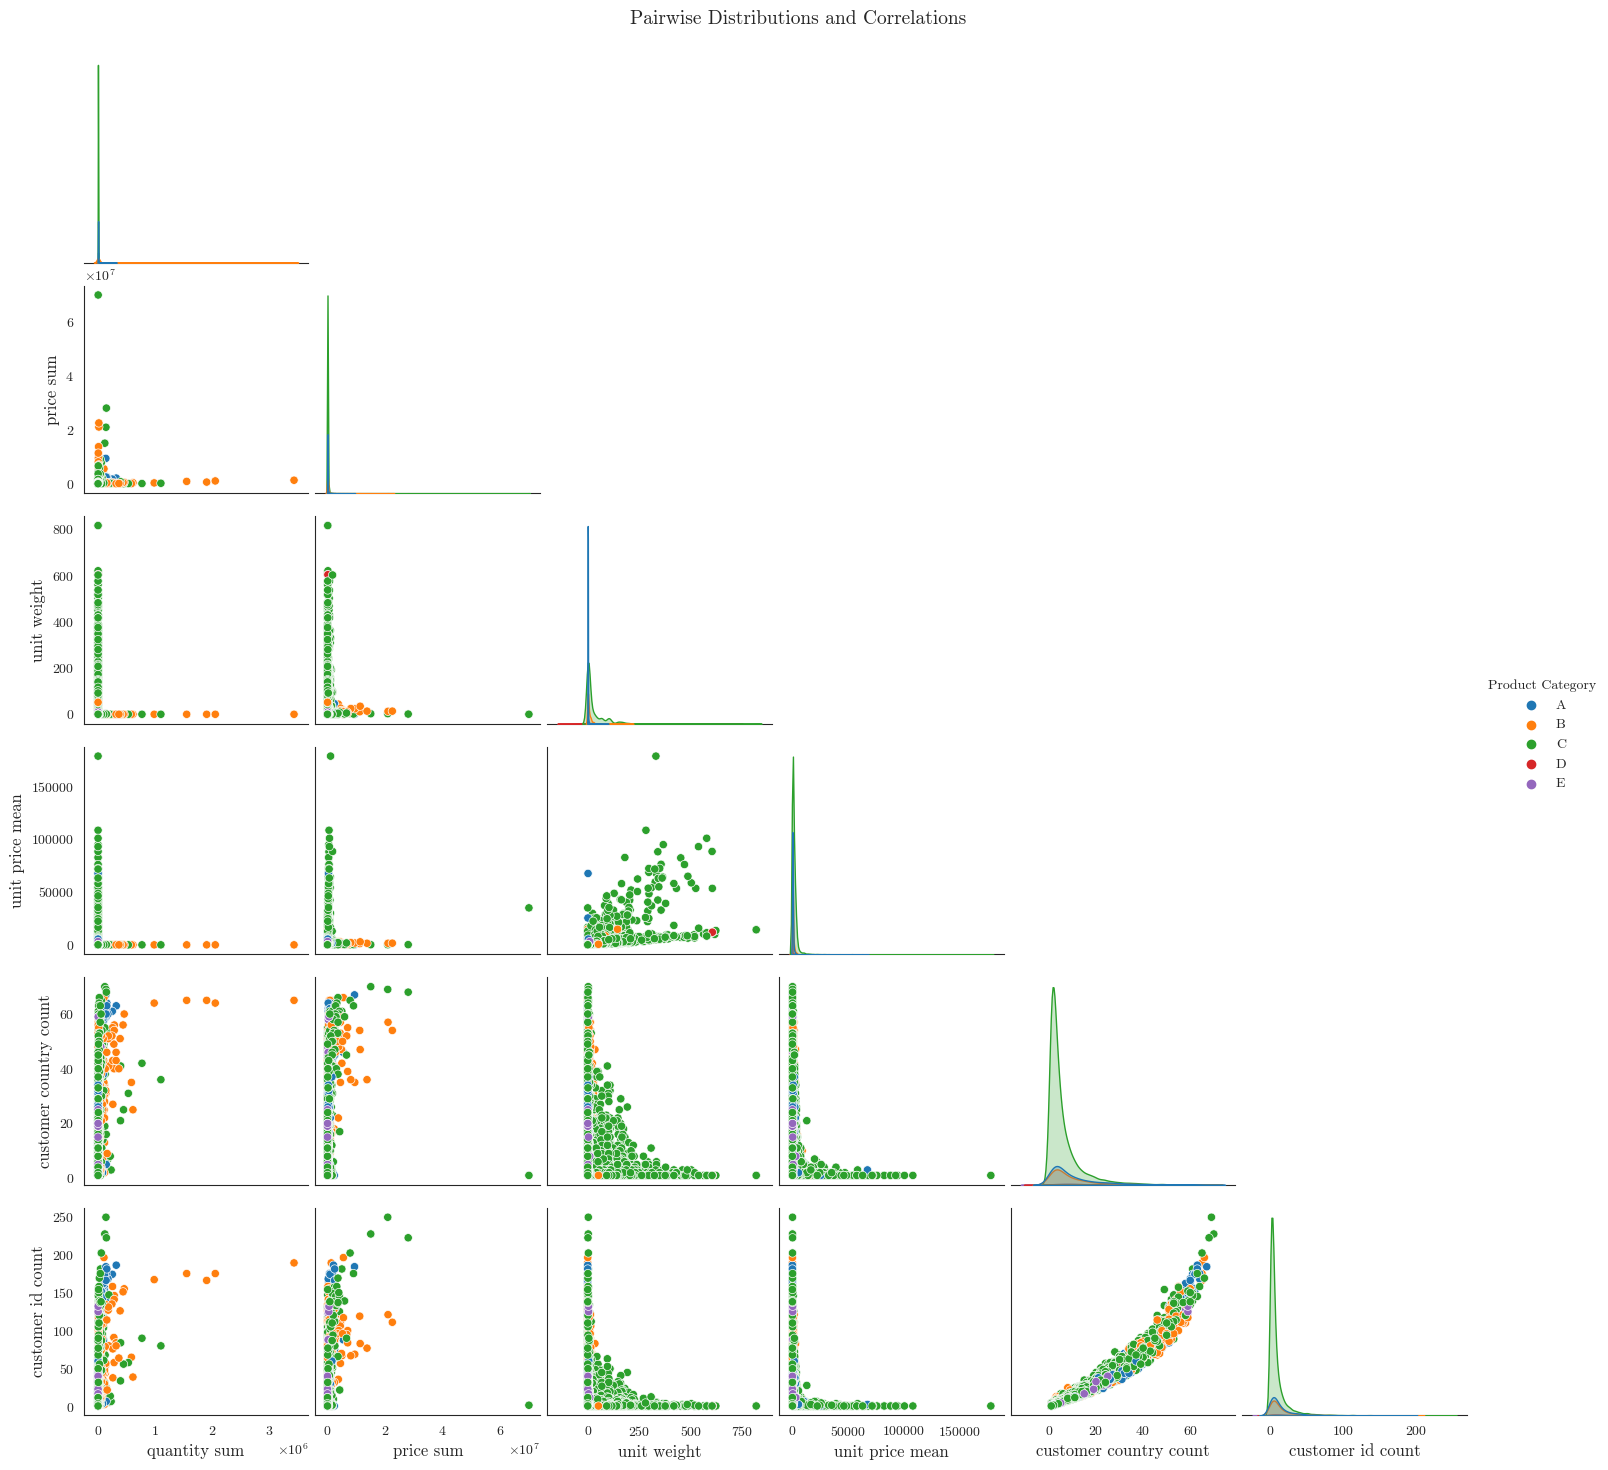

<Figure size 3200x2400 with 0 Axes>

In [24]:
# Set the style of the visualization
sns.set_style("white")

# Font settings
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = True

numerical_features = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_country_count', 'customer_id_count']

# Set the style of the visualization
# sns.set_style("white")

# Define the category order
category_order = ['A', 'B', 'C', 'D', 'E']

# Convert 'category_bertopic' to a categorical type with the specified order
df_bertopic_labeled['category_bertopic'] = pd.Categorical(df_bertopic_labeled['category_bertopic'], categories=category_order, ordered=True)

# Plotting pairplot with the hue_order parameter
corr_plot = sns.pairplot(df_bertopic_labeled, vars=numerical_features, diag_kind="kde", 
                         hue='category_bertopic', hue_order=category_order, corner=True)
# corr_plot.map_lower(sns.kdeplot, levels=4, color=".2")

# Add a title above the plot
plt.suptitle('Pairwise Distributions and Correlations', fontsize=14)

# Adjust the layout tos make space for the title
plt.subplots_adjust(top=0.95)

# Rename the axes with formatted feature names
for ax in corr_plot.axes.flatten():
    if ax is not None:
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()
        ax.set_xlabel(xlabel.replace('_', ' '), fontsize =12)
        ax.set_ylabel(ylabel.replace('_', ' '), fontsize =12)

# Set legend title
legend = corr_plot._legend
legend.set_title('Product Category')  # Set your legend title her

plt.figure(dpi = 500)

# Show the plot
plt.show()

<Figure size 1920x1440 with 0 Axes>

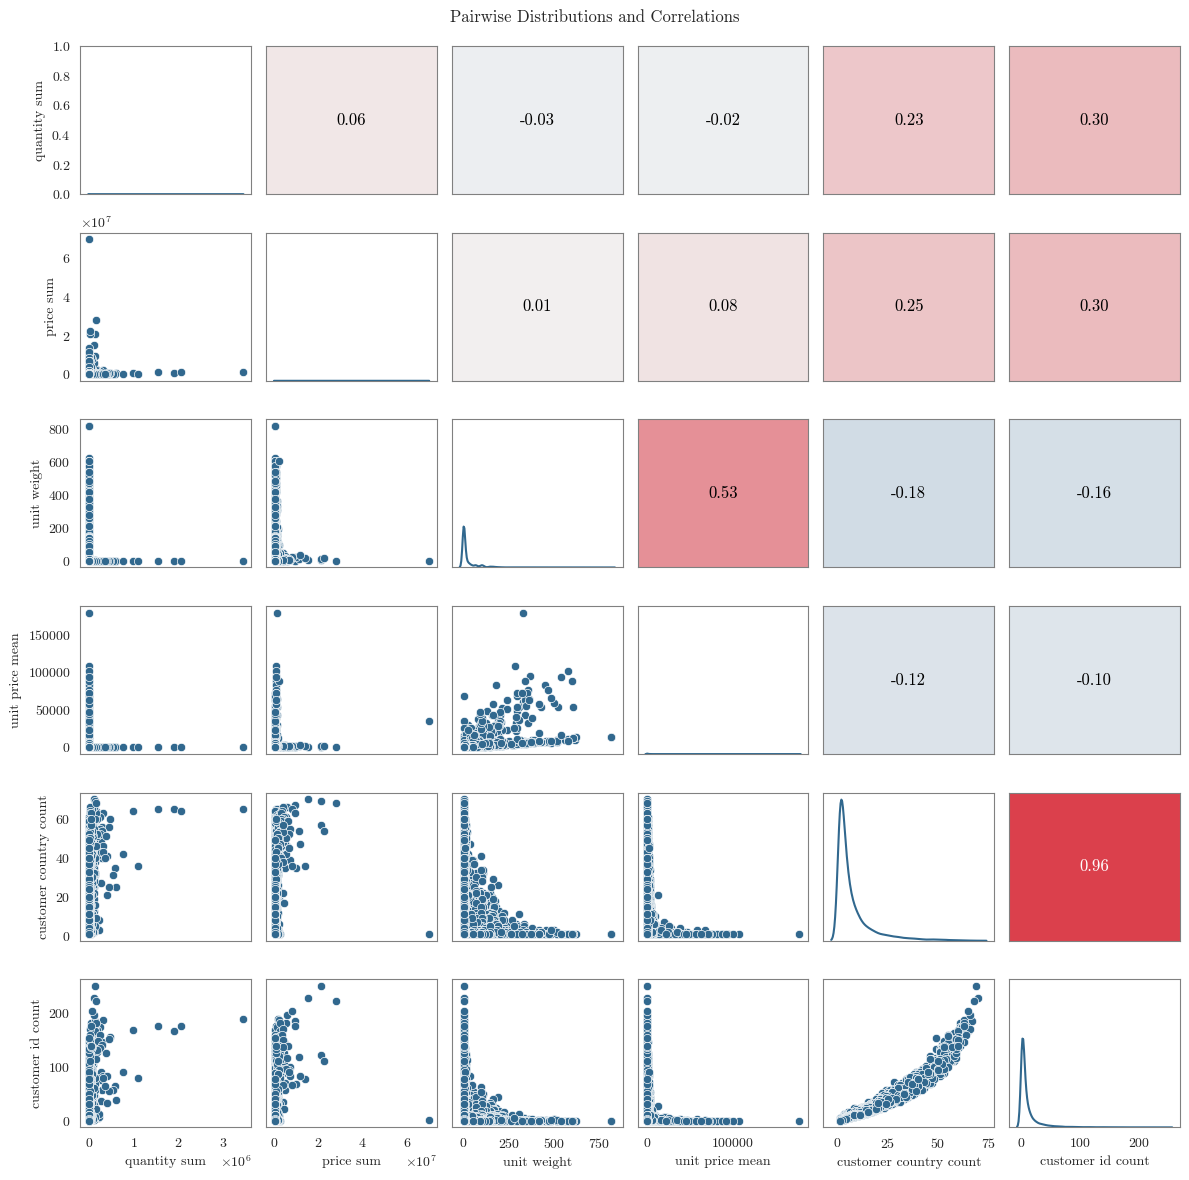

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as font_manager

sns.set_style("white")

plt.figure(dpi=300)

# Font settings
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif'] = [cmfont.get_name()]
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = True

# Create a custom function to create heatmap for the upper triangle
def my_heatmap(x, y, **kwargs):
    corr_coef = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    # Choose the color white if corr_coef > 0.5, else black
    text_color = 'white' if corr_coef > 0.6 else 'black'
    ax.set_facecolor(sns.diverging_palette(240, 10, n=256)[int((corr_coef + 1) * 128)])
    ax.annotate(f"{corr_coef:.2f}", xy=(.5, .5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=12, color=text_color)

# Data preparation (replace this with your actual data)
data = df_bertopic_labeled[numerical_features]  # Replace df[num_cols] with your actual DataFrame

# Create a PairGrid instance
grid = sns.PairGrid(data, height=2)

# Define a function to format each cell like a table cell with borders
def format_cell(x, y, **kwargs):
    ax = plt.gca()
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.8)
        spine.set_edgecolor('gray')

# Choose a color from the viridis palette
viridis_color = sns.color_palette("viridis", 2)  # Gets the first color from the palette

# Define the category order
category_order = ['A', 'B', 'C', 'D', 'E']

# Convert 'category_bertopic' to a categorical type with the specified order
df_bertopic_labeled['category_bertopic'] = pd.Categorical(df_bertopic_labeled['category_bertopic'], categories=category_order, ordered=True)

# Map the plots to the lower, upper, and diagonal
grid.map_lower(sns.scatterplot, color = viridis_color[0])
grid.map_diag(sns.kdeplot, color = viridis_color[0])
grid.map_upper(my_heatmap)  # heatmap is the function defined previously

# Apply the formatting to all axes
grid.map(format_cell)

# Adjust layout
plt.tight_layout()

# Title with a different font for labels
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairwise Distributions and Correlations', fontproperties=cmfont, fontsize=12)

# Label customization
for ax in grid.axes.flatten():
    ax.set_xlabel(ax.get_xlabel().replace('_', ' '), fontproperties='serif')
    ax.set_ylabel(ax.get_ylabel().replace('_', ' '), fontproperties='serif')

# Show the plot
plt.show()

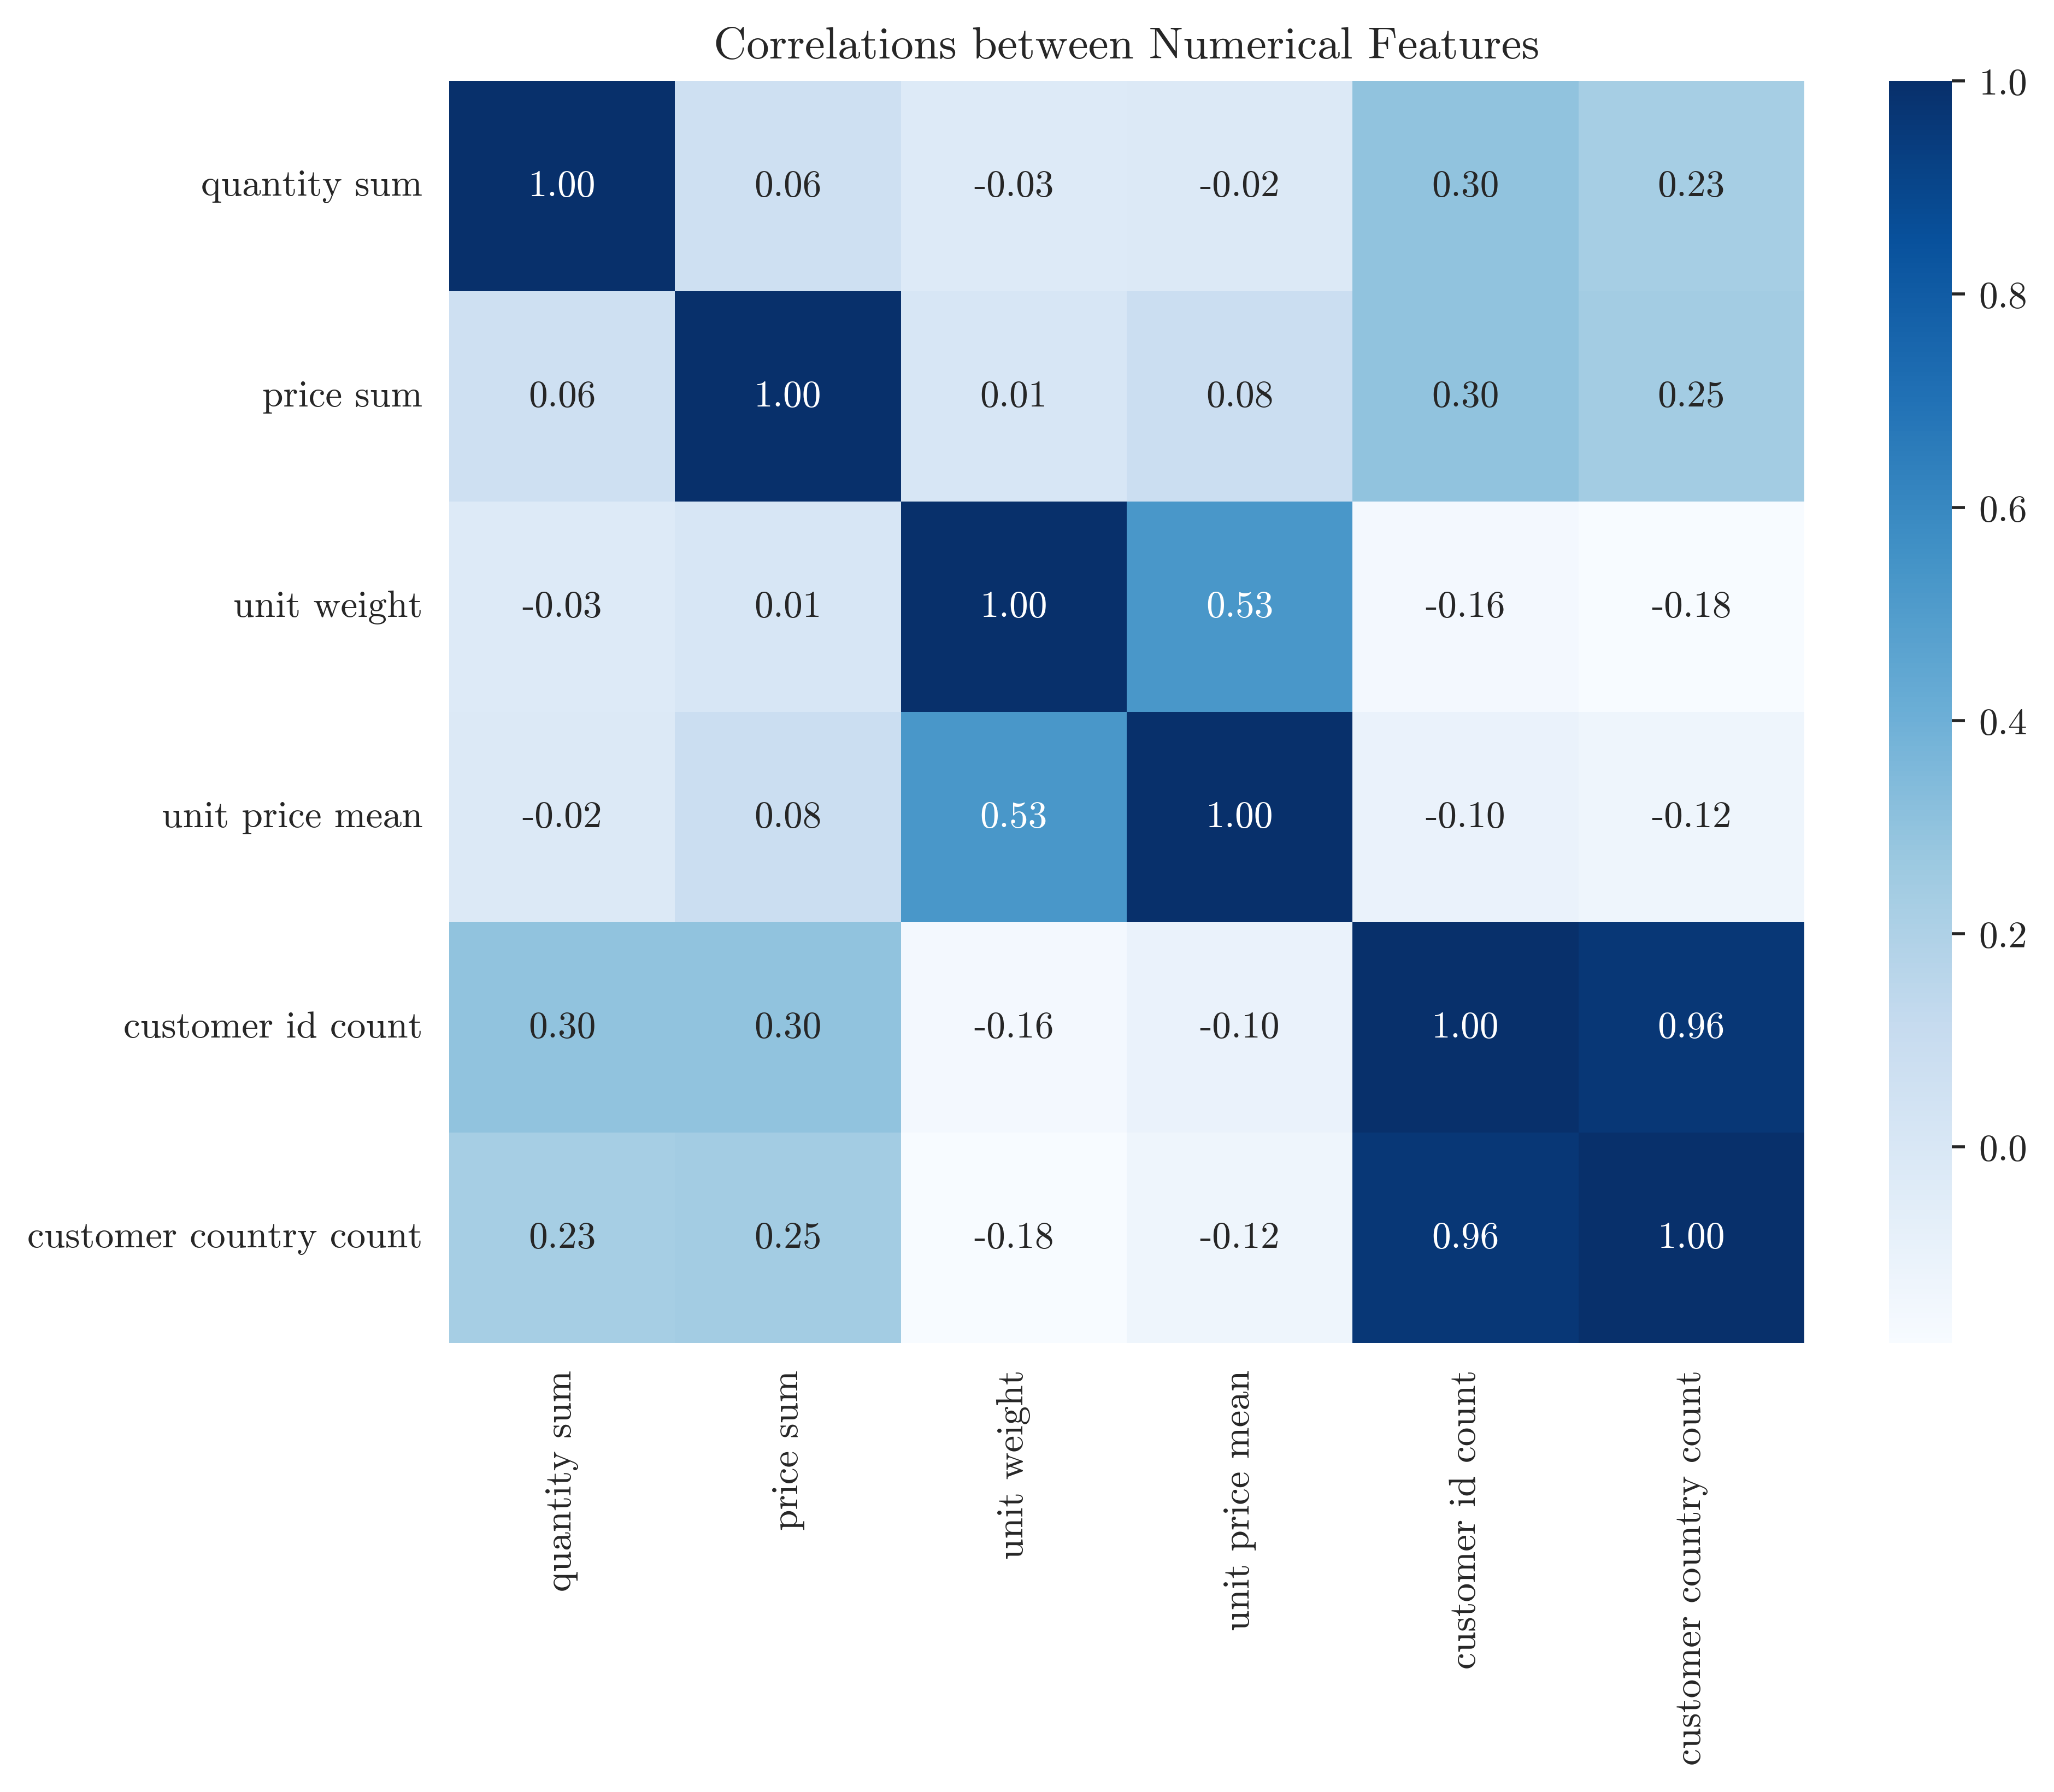

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Font settings
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = True

# Assuming df_bertopic_labeled is your DataFrame with the required numerical features
numerical_features = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_id_count', 'customer_country_count',]

# Compute the correlation matrix
corr = df_bertopic_labeled[numerical_features].corr()

corr.columns = corr.columns.str.replace('_', ' ')
corr.index = corr.index.str.replace('_', ' ')

# Set up the matplotlib figure
plt.figure(figsize=(8, 6), dpi = 500)

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')

# Add a title
plt.title('Correlations between Numerical Features')

# Show the plot
plt.show()

In [24]:
# import pandas as pd
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Assuming you have a pandas DataFrame named 'df' with 'description' and 'category_bertopic' columns.
# # Replace this with your actual DataFrame loading method.
# # df = pd.read_csv('your_file.csv')

# # Define the categories you're interested in
# categories = ['A', 'B', 'C', 'D', 'E']

# # Set up the plot grid
# fig, axs = plt.subplots(1, 5, figsize=(20, 4))  # Adjust the size as needed

# for i, category in enumerate(categories):
#     # Filter the DataFrame for the category
#     category_text = " ".join(df_bertopic_labeled.loc[df_bertopic_labeled['category_bertopic'] == category, 'description'].astype(str))
    
#     # Generate the word cloud
#     wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(category_text)
    
#     # Plot
#     axs[i].imshow(wordcloud, interpolation='bilinear')
#     axs[i].set_title(f'Category {category}')
#     axs[i].axis('off')

# plt.tight_layout()
# plt.show()

#### Boxplots with numerical features distributions

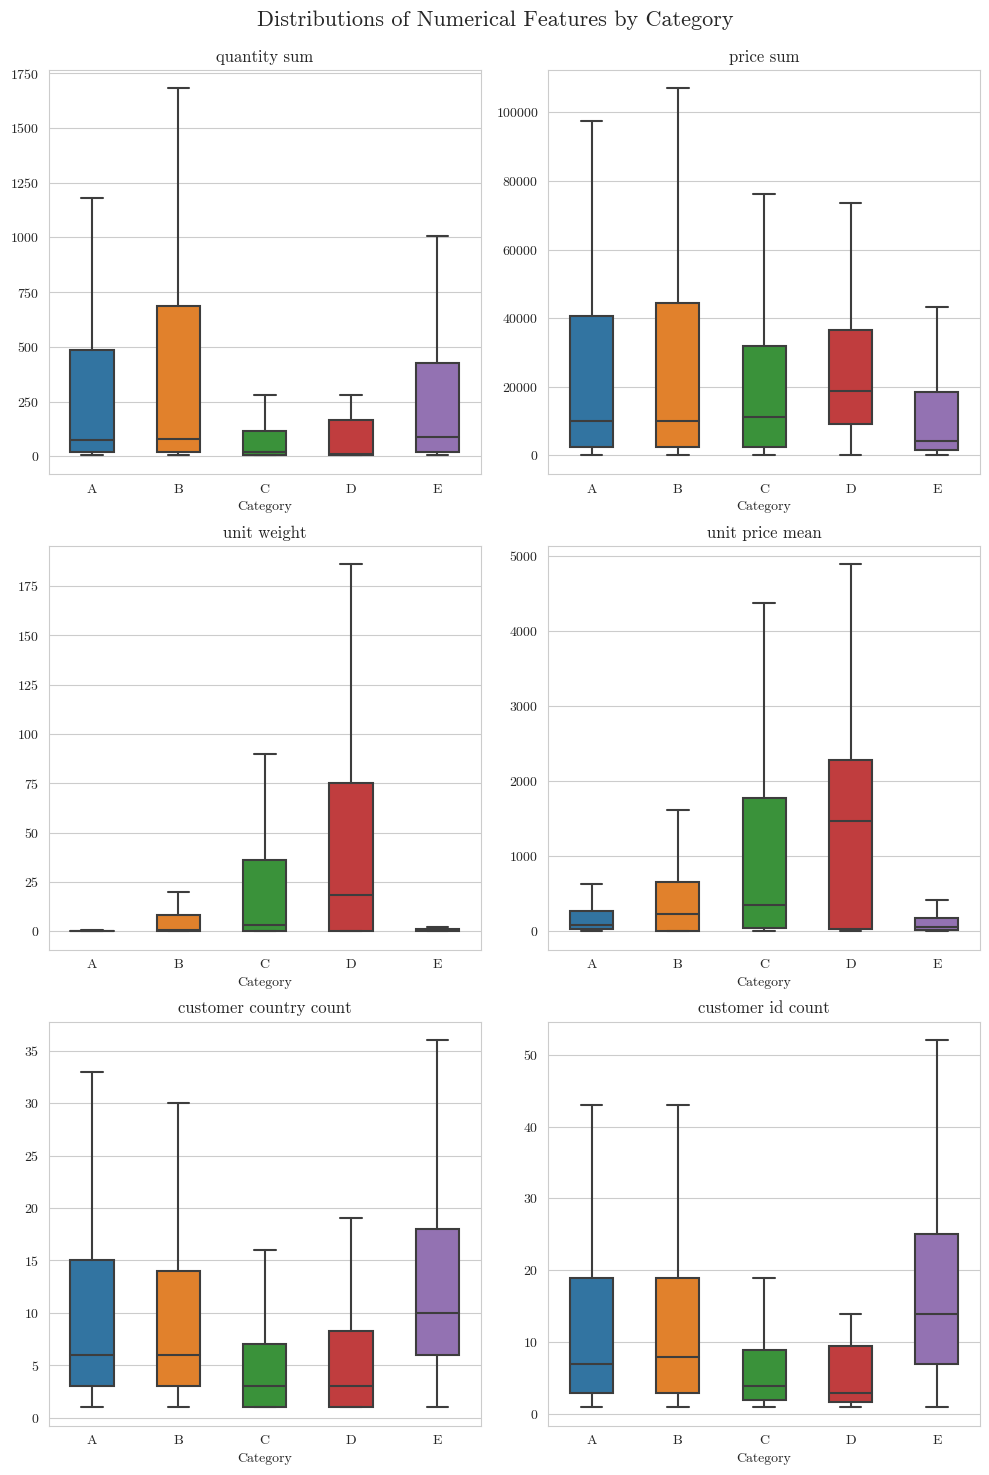

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_country_count', 'customer_id_count']

# Define the size of the entire figure and create a 2-column, 3-row grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 5 * 3))  # Adjusted for 3 rows and 2 columns

# Set order for categories
order = sorted(df_bertopic_labeled['category_bertopic'].unique())

for idx, feature in enumerate(numerical_features):
    # Determine the row and column index
    row_idx = idx // 2  # Integer division to determine row
    col_idx = idx % 2   # Modulo to determine column

    sns.boxplot(x='category_bertopic', y=feature, data=df_bertopic_labeled, width=0.5, showfliers=False, order=order, ax=axes[row_idx, col_idx])
    
    # Replace underscores with spaces in the feature name for the title
    formatted_feature_name = feature.replace('_', ' ')
    axes[row_idx, col_idx].set_title(f'{formatted_feature_name}')
    
    axes[row_idx, col_idx].set_xlabel('Category')
    axes[row_idx, col_idx].set_ylabel('')  # Remove the y-axis label

# Adjust the layout
plt.tight_layout()

plt.subplots_adjust(top=0.94)  # Adjust the top spacing to fit the suptitle
plt.suptitle('Distributions of Numerical Features by Category', fontsize=16)

# Save the figure using your function
save_figure(fig, 'bertopic_labels_boxplot_all_num_feat')

plt.show()

In [26]:
# # Assuming you've already imported the necessary libraries and defined the save_figure function

# plt.figure(figsize=(12,10))
# sns.heatmap(df_bertopic_labeled[numerical_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Heatmap')

# # Adjust the layout to ensure everything fits
# plt.tight_layout()

# # Save the figure using the save_figure function
# fig = plt.gcf()  # Gets the current figure
# save_figure(fig, 'bertopic_labeled_corr_feat_heatmap')

# plt.show()

In [27]:
# # Plotting pairplot
# corr_plot = sns.pairplot(data=df_bertopic_labeled[numerical_features], diag_kind="kde", corner=True)

# # Adjusting the layout to ensure everything fits well
# plt.tight_layout()

# # Add space at the top for the title
# plt.subplots_adjust(top=0.95)

# # Add a title above the plot using plt.suptitle()
# plt.suptitle('Pairwise Distribution of Numerical Features')

# # Saving the pairplot using save_figure function
# save_figure(corr_plot.fig, 'bertopic_labeled_corr_dist_plot')

# plt.show()


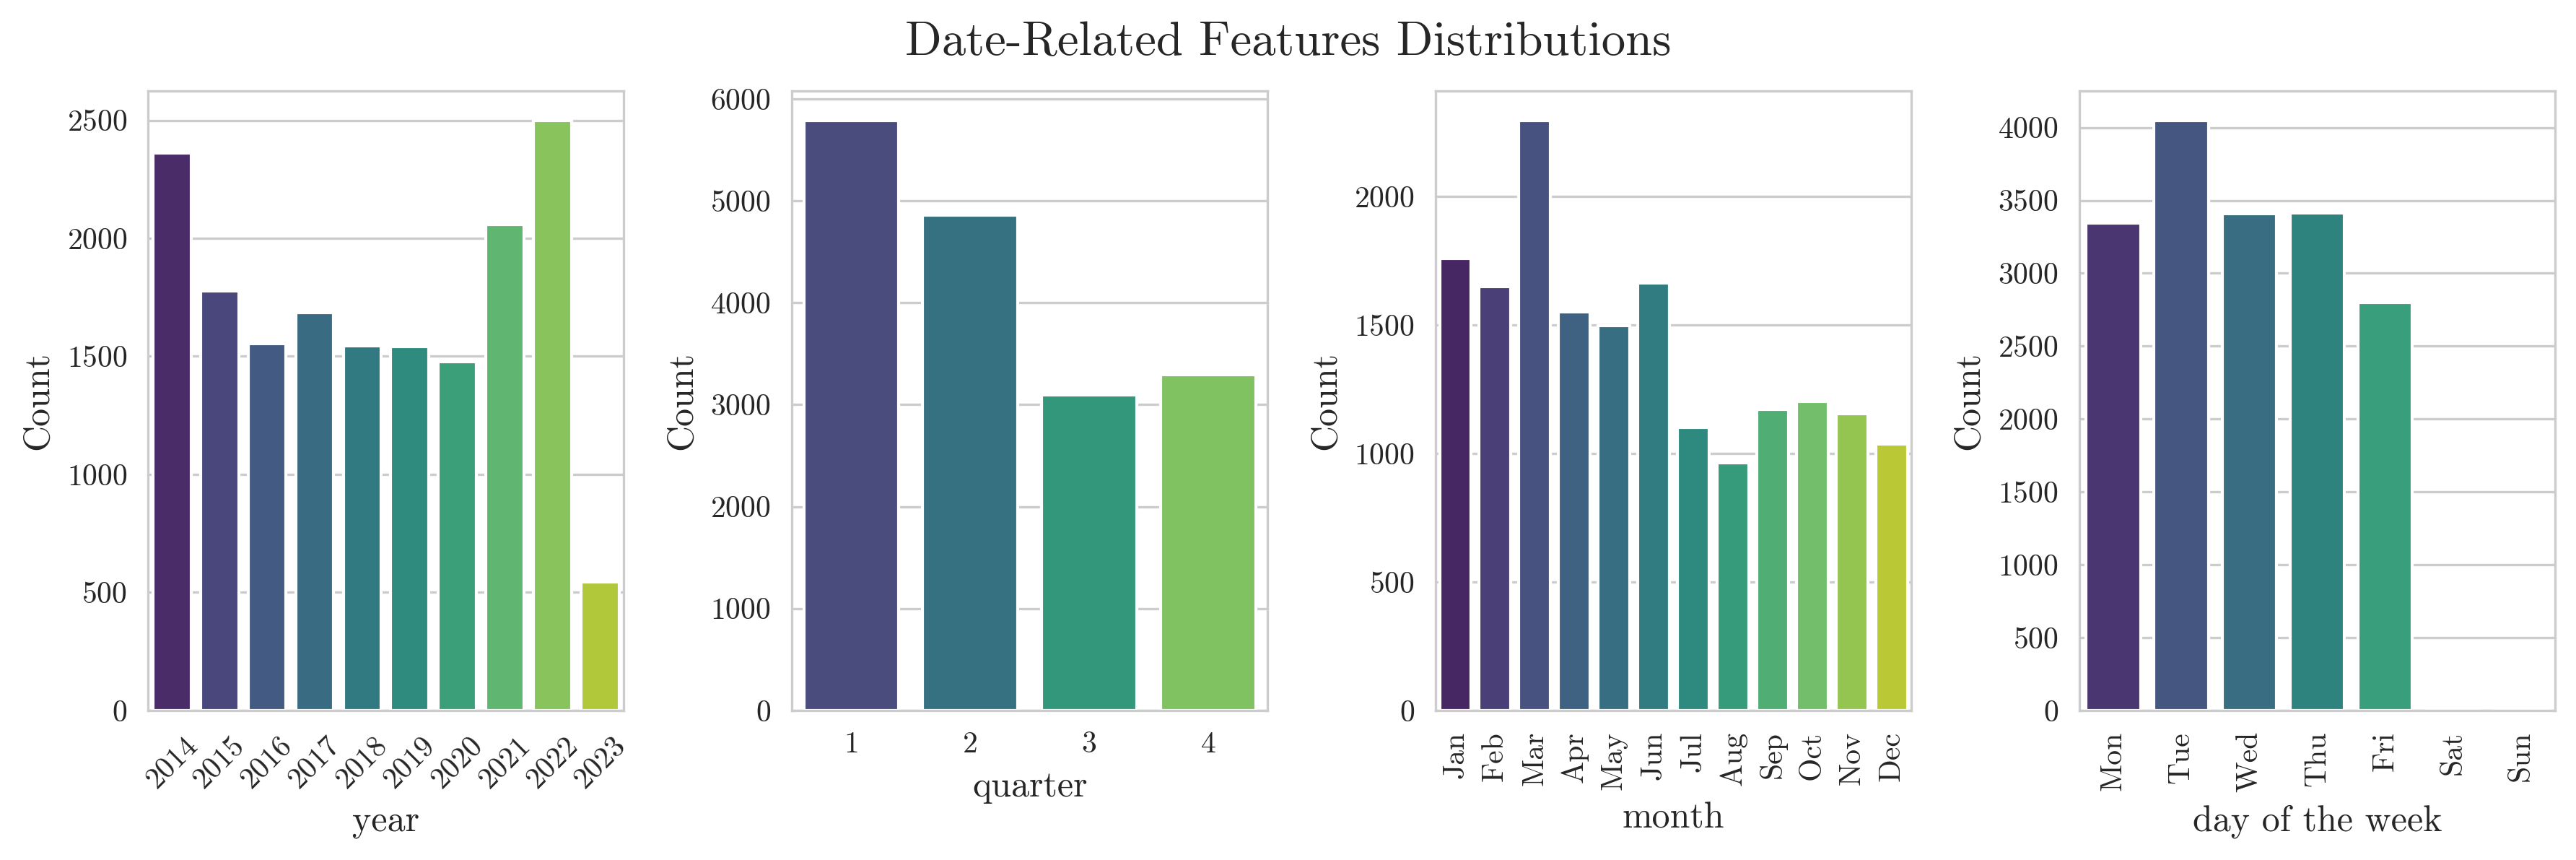

In [28]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Font settings
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = True

# Prepare the figure layout with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 4), sharex=False, dpi = 300)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of categorical columns
columns = ['year_mode', 'quarter_mode', 'month_mode', 'day_week_mode']
# Corresponding x-axis labels
x_labels = ['year', 'quarter', 'month', 'day of the week']

# Iterate over the categorical columns and create a countplot for each
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df_bertopic_labeled, ax=axes[i], palette='viridis')
    axes[i].set_xlabel(x_labels[i], fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    # Set custom x-tick labels for month and day of the week if applicable
    if col == 'month_mode':
        axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)
    # Inside your loop, after creating the countplot for each subplot:
    if col == 'year_mode':
        axes[i].tick_params(axis='x', rotation=45)

    elif col == 'day_week_mode':
        axes[i].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=90)

# Adjust the layout
plt.tight_layout()

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the main title
fig.suptitle('Date-Related Features Distributions', fontsize=16, fontproperties=cmfont)

# Show the plot
plt.show()

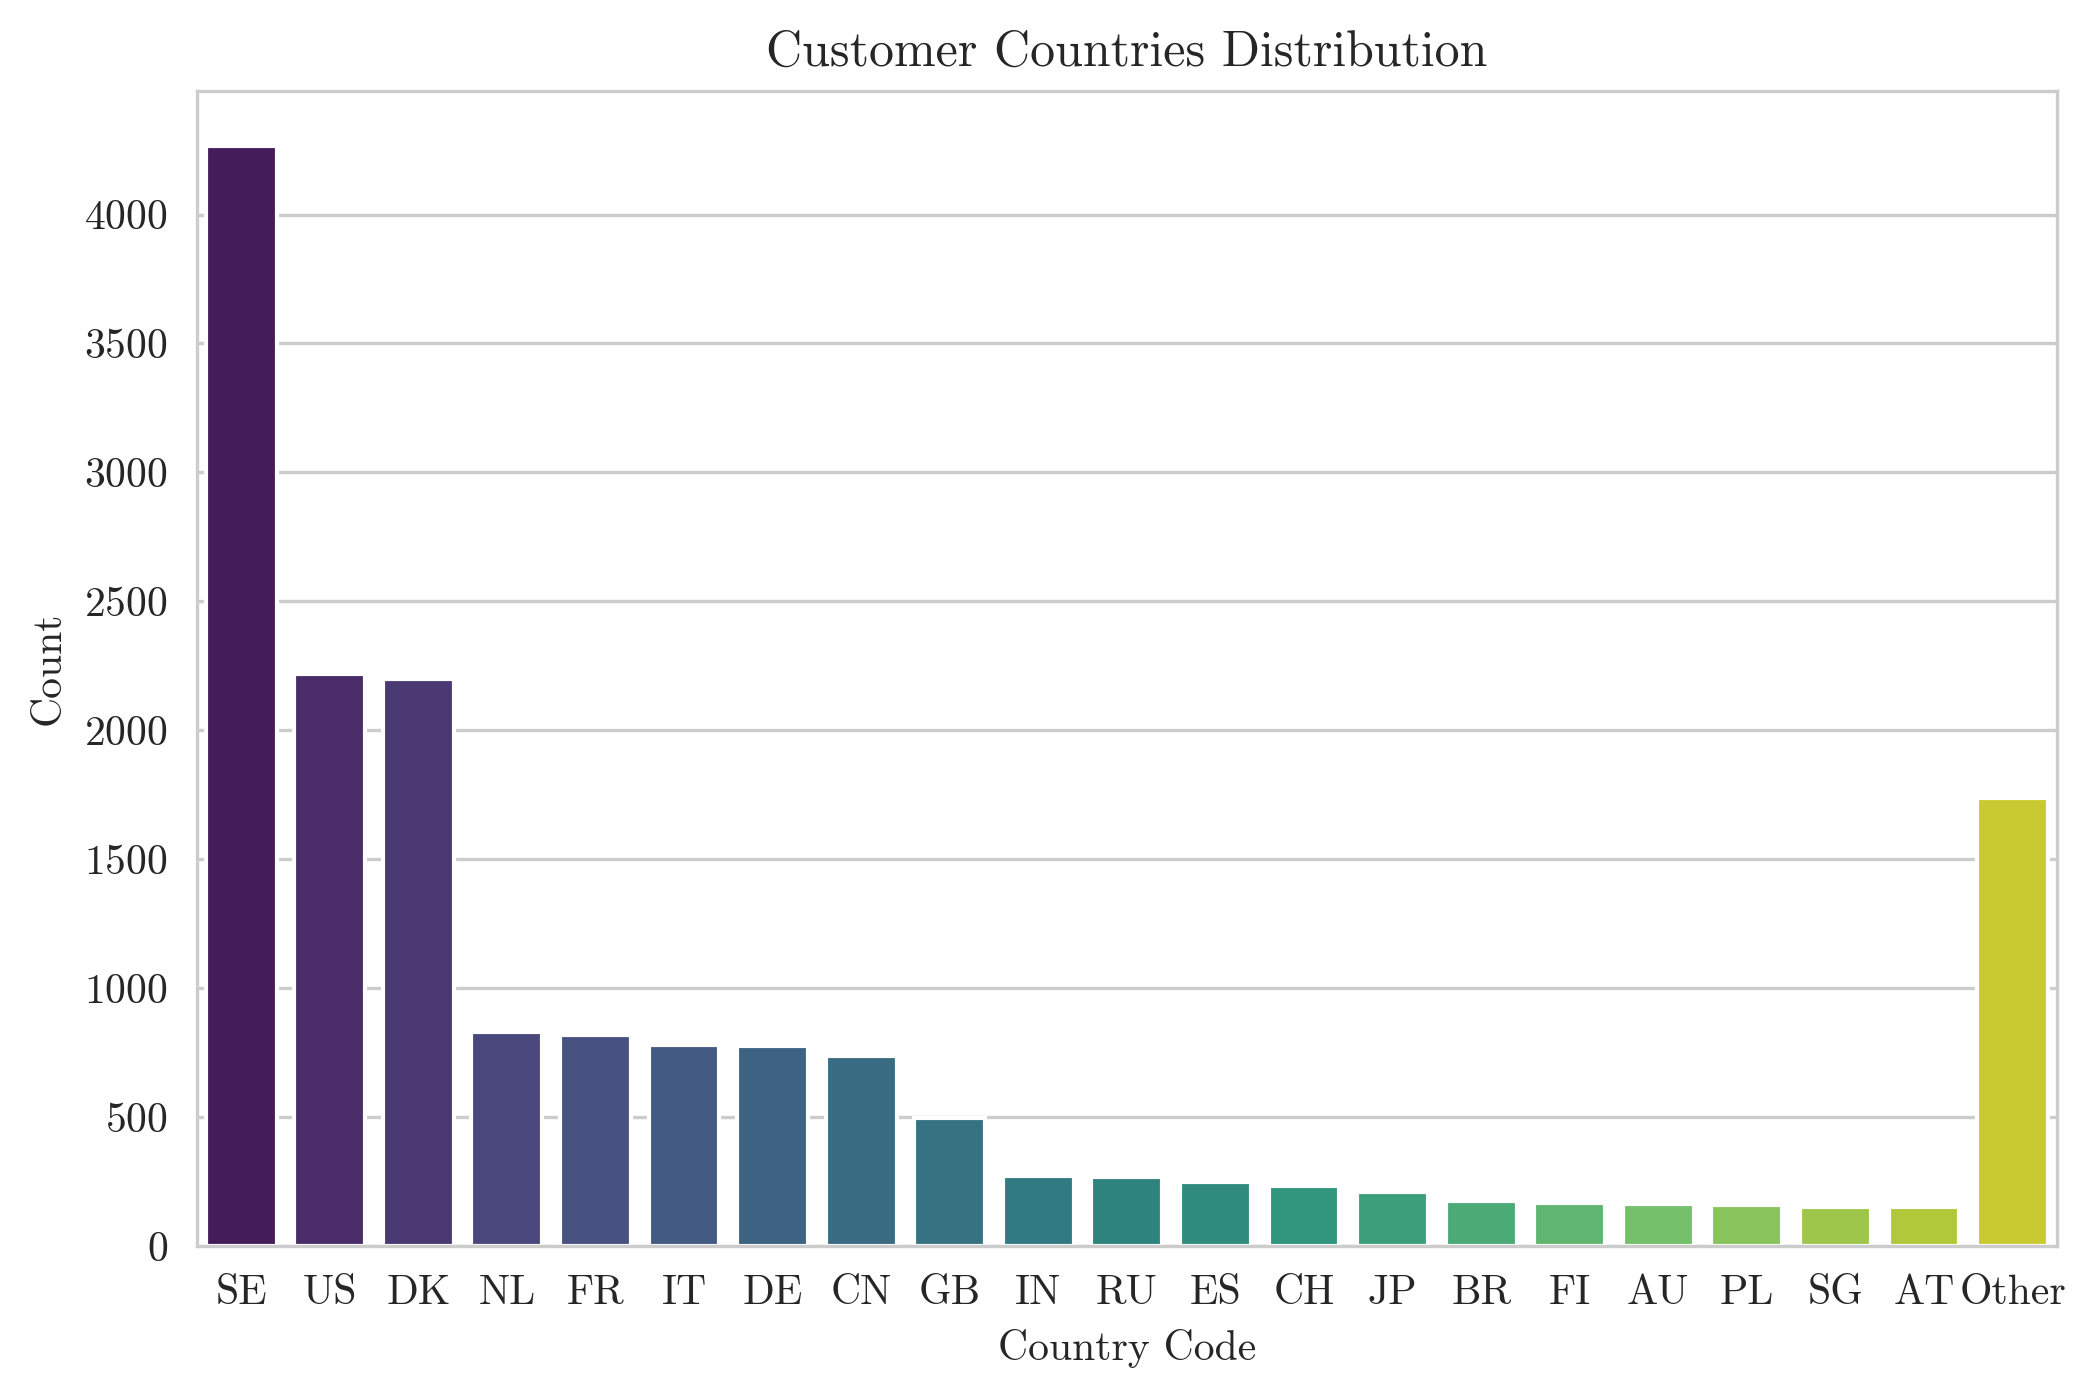

In [34]:
# Set the threshold for the top N countries to display
top_n = 20

# Calculate the counts of each country code
country_counts = df_bertopic_labeled['customer_country_mode'].value_counts()

# Create a DataFrame for the top N countries
top_countries = country_counts.head(top_n).reset_index()
top_countries.columns = ['country_code', 'count']

# Add an 'Other' category for the rest of the countries
other_count = pd.DataFrame(data={
    'country_code': ['Other'],
    'count': [country_counts.iloc[top_n:].sum()]
})

# Combine the top countries with the 'Other' category
final_counts = pd.concat([top_countries, other_count], ignore_index=True)

# Create the bar plot
plt.figure(figsize=(8, 5), dpi = 300)
sns.barplot(x='country_code', y='count', data=final_counts, palette='viridis')
plt.title('Customer Countries Distribution')
plt.xlabel('Country Code')
plt.ylabel('Count')

# Show the plot
plt.show()

In [11]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Font settings
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = True

# List of categorical columns and corresponding x-axis labels
columns = ['year_mode', 'quarter_mode', 'month_mode', 'day_week_mode']
x_labels = ['year', 'quarter', 'month', 'day of the week']

# List of categories
categories = ['A', 'B', 'C', 'D', 'E']

# Get a list of colors from the default Seaborn palette
palette = sns.color_palette(None, len(categories))
color_dict = dict(zip(categories, palette))

# Create a figure to hold all subplots
fig, big_axes = plt.subplots(len(categories), 1, figsize=(12, 20), dpi=500)

# List of days for labeling
day_labels = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title(f"Category {categories[row - 1]}", fontsize=16, fontweight='bold')
    big_ax.axis('off')  # Hide frame and ticks

    # Create subplots for each category
    for i, col in enumerate(columns):
        ax = fig.add_subplot(len(categories), len(columns), (row - 1) * len(columns) + i + 1)
        sns.countplot(x=col, data=df_bertopic_labeled[df_bertopic_labeled['category_bertopic'] == categories[row - 1]], 
                      ax=ax, palette=[color_dict[categories[row - 1]]])
        ax.set_xlabel(x_labels[i], fontsize=14)
        ax.set_ylabel('Count', fontsize=14)

        # Set y-axis label only for the first subplot in each row
        if i == 0:
            ax.set_ylabel('Count', fontsize=14)
        else:
            ax.set_ylabel('')  # Disable y-axis label for other subplots

        # Set x-tick labels based on column type
        if col == 'day_week_mode':
            unique_days = df_bertopic_labeled[col].unique()
            ax.set_xticks(unique_days)
            ax.set_xticklabels([day_labels.get(day, '') for day in unique_days], rotation=90)
        elif col == 'month_mode':
            ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)
        elif col == 'year_mode':
            ax.tick_params(axis='x', rotation=90)
        elif col == 'day_week_mode':
            ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=90)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top to make space for the main title
fig.suptitle('Date-Related Features Distributions by Category', fontsize=20, fontweight='bold', fontproperties=cmfont)

# Show the plot
plt.show()


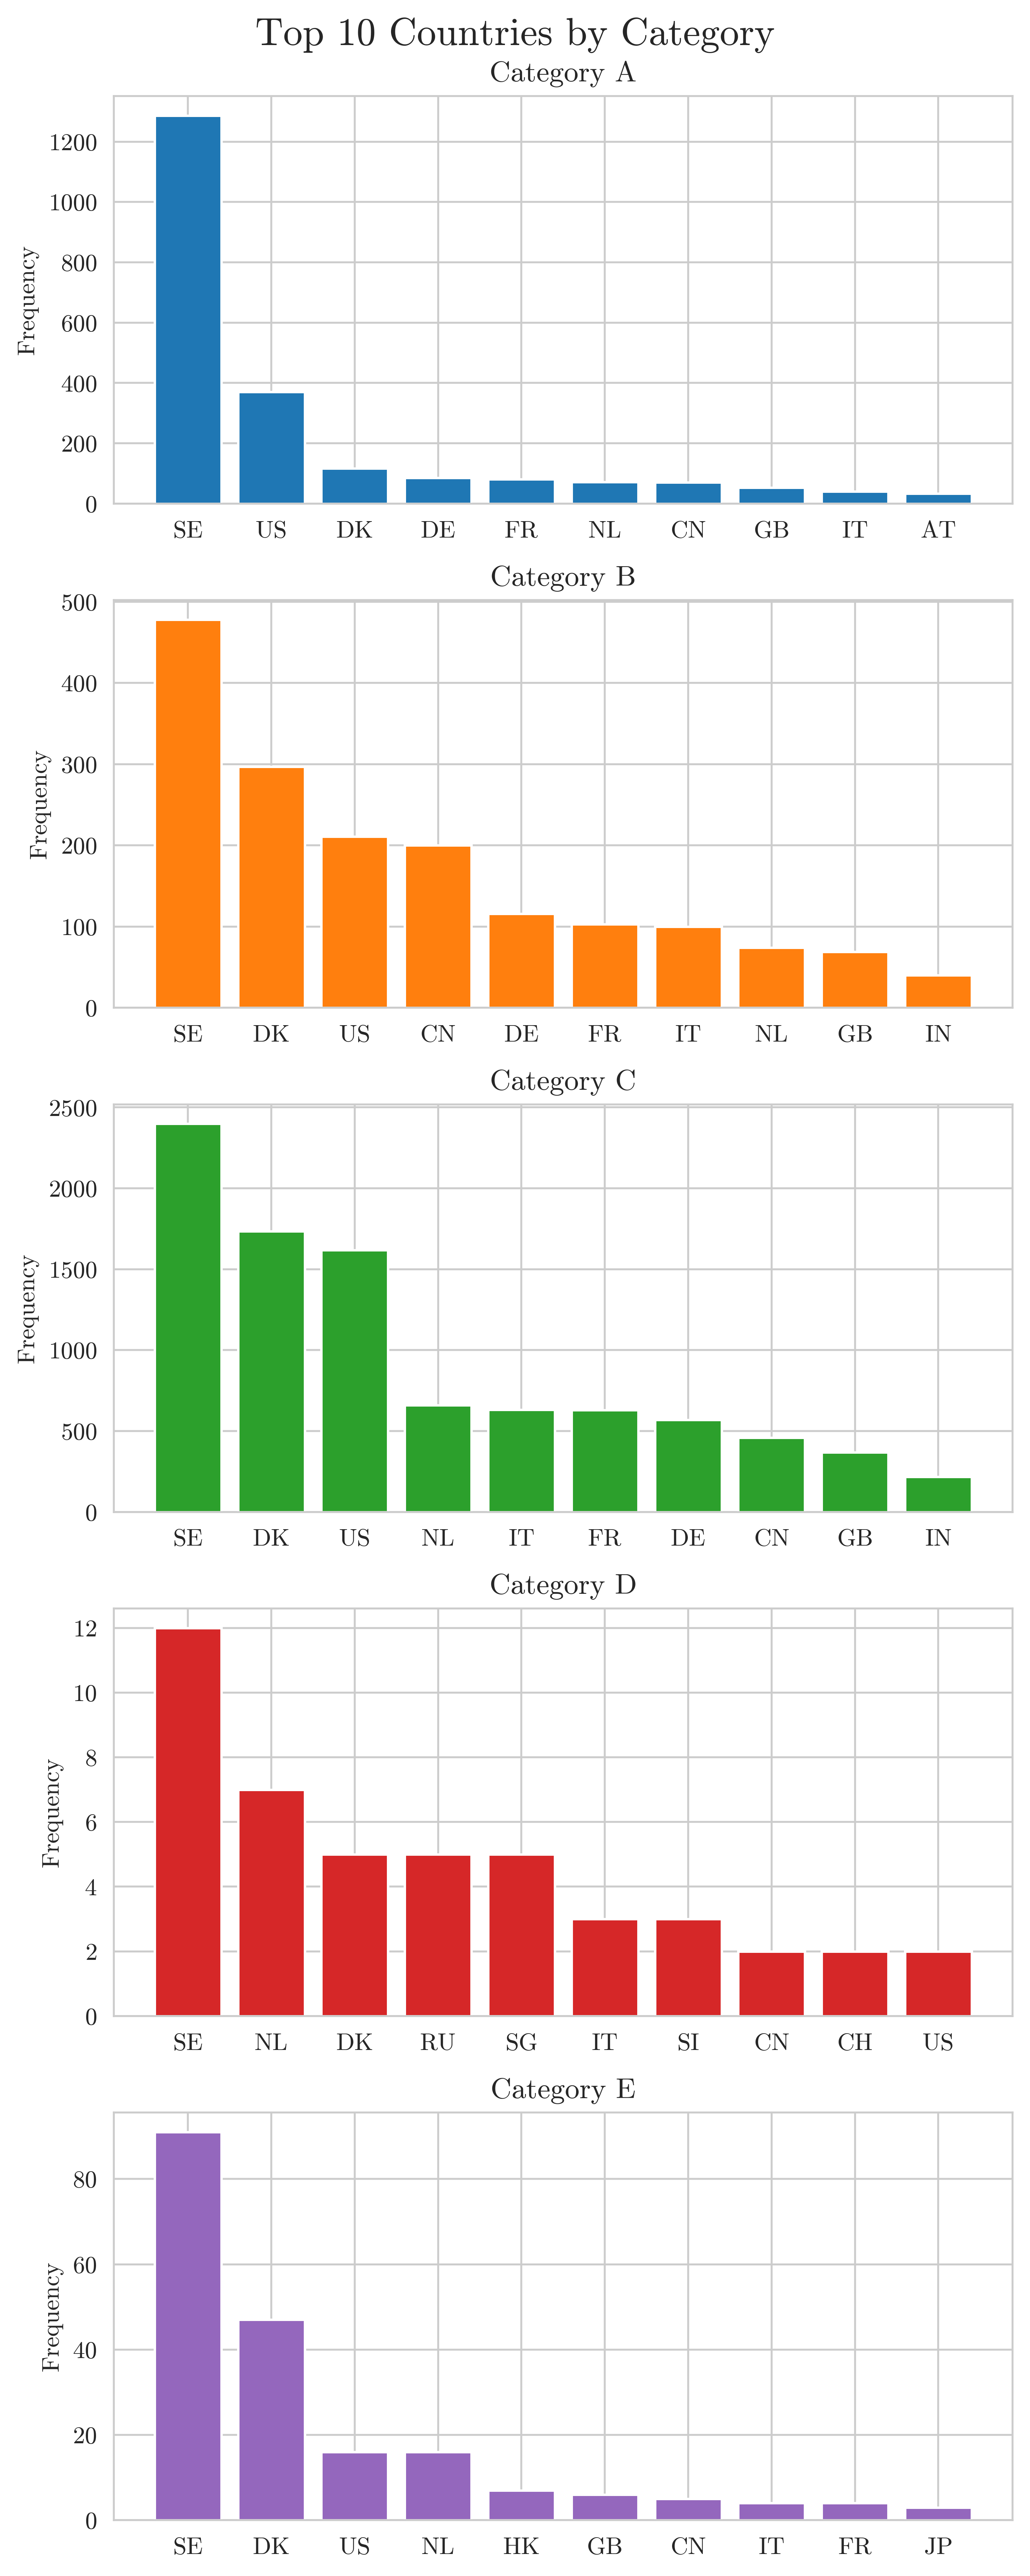

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from matplotlib import font_manager
import matplotlib as mpl

# Assuming 'A-E' is the desired order. If there are more categories, expand the list.
desired_order = ['A', 'B', 'C', 'D', 'E']

# Filter and sort the unique categories based on the desired order
unique_categories = [cat for cat in desired_order if cat in df_bertopic_labeled['category_bertopic'].unique()]

n_categories = len(unique_categories)

# Adjust the figure size here
fig, axs = plt.subplots(n_categories, 1, figsize=(6, 3 * n_categories), dpi=500)

# Get a list of colors from the default Seaborn palette
palette = sns.color_palette(None, len(unique_categories))
color_dict = dict(zip(desired_order, palette))

for ax, category in zip(axs, unique_categories):
    category_data = df_bertopic_labeled[df_bertopic_labeled['category_bertopic'] == category]
    top_countries = category_data['customer_country_mode'].value_counts().head(10)
    bars = ax.bar(top_countries.index, top_countries.values, color=[color_dict[category]] * len(top_countries))
    ax.set_title(f'Category {category}')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=0)  # Adjust rotation if necessary

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Top 10 Countries by Category', fontsize=16, fontproperties=cmfont)

# Uncomment and replace 'save_figure' with your save function if needed
# save_figure(fig, 'bertopic_labeled_top_customer_countries_combined')

plt.show()

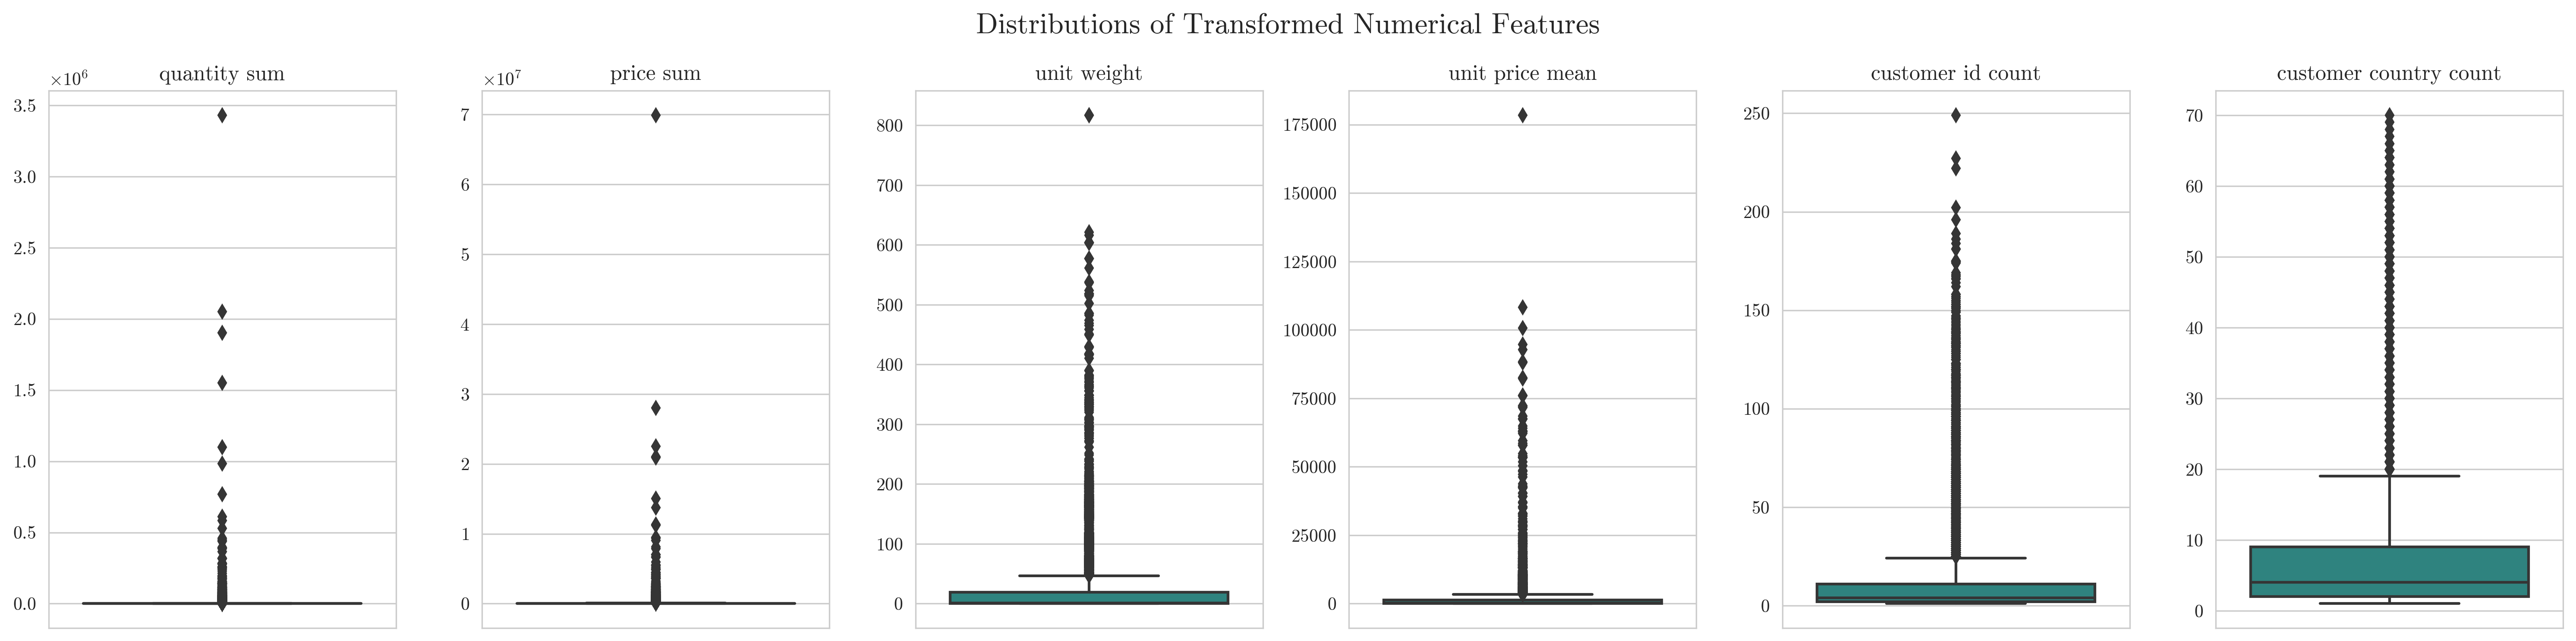

In [20]:
# List of features to plot
features = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_id_count', 'customer_country_count']

# Setting up the figure and axis
fig, axs = plt.subplots(1, len(features), figsize=(20, 5), dpi = 300)

# Loop over each feature and plot a boxplot on its respective axis
for i, feature in enumerate(features):
    sns.boxplot(y=df_bertopic_labeled[feature], ax=axs[i], palette='viridis')
    axs[i].set_title(feature.replace('_', ' '))
    axs[i].set_xlabel('')  # Remove the x-axis label
    axs[i].set_ylabel('')  # Remove the y-axis label

# Add a main title to the subplots
fig.suptitle('Distributions of Transformed Numerical Features', fontsize=16)

# Adjust subplot parameters to fit the main title
fig.subplots_adjust(top=0.92)

plt.tight_layout()

# Save the figure
# save_figure(fig, 'bertopic_data_transformed_multiple_boxplots_robust')

plt.show()

### LazyPredict

In [8]:
cat_columns = ['customer_country_mode', 'month_mode', 'year_mode', 'quarter_mode', 'day_week_mode']
num_columns = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_id_count','customer_country_count']

In [9]:
pipeline = PreprocessingPipeline(cat_columns, num_columns)
df_transformed = pipeline.fit_transform(df_bertopic_labeled)
transformed_df_with_headers = pipeline.get_transformed_df()

In [14]:
len(transformed_df_with_headers.columns)

112

Visualize transformed data - RobustScaler

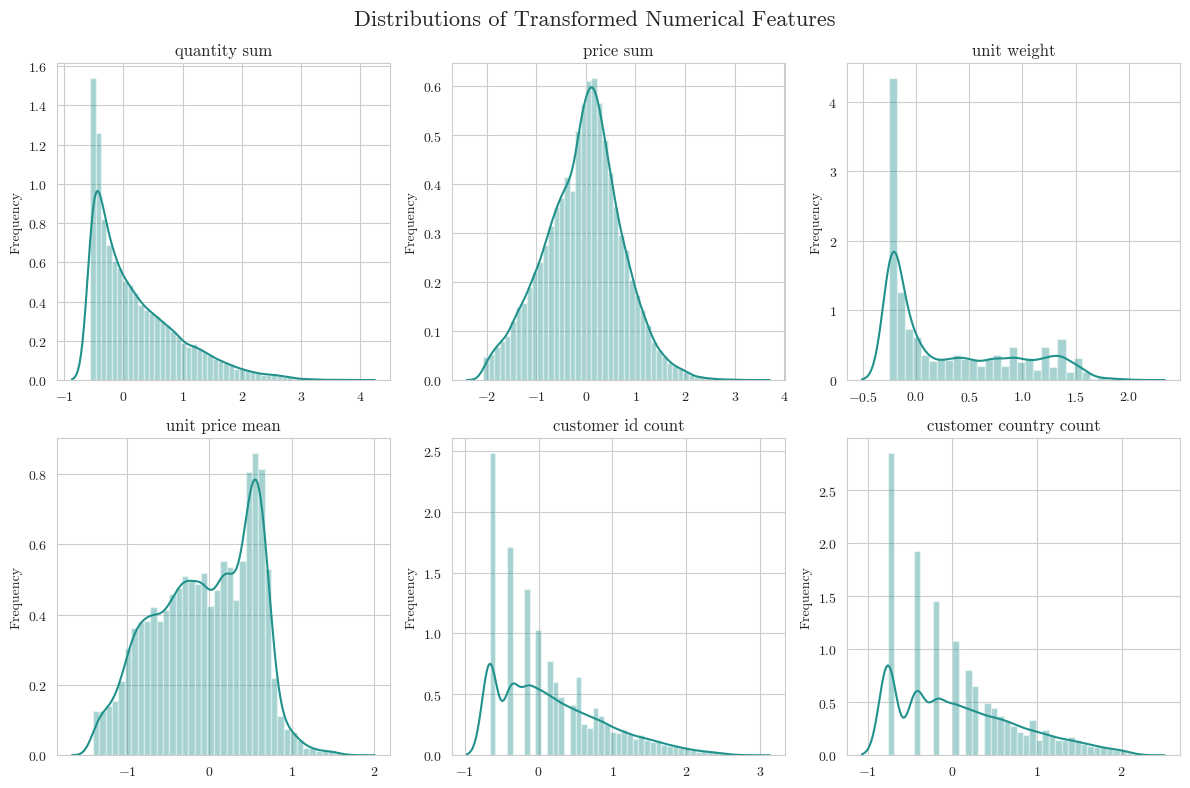

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_id_count', 'customer_country_count']

# Create subplots
n_rows = 2
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 8))

# Select a color from the middle of the viridis color palette
viridis_color = plt.cm.viridis(0.5)

for idx, feature in enumerate(features):
    row = idx // n_cols
    col = idx % n_cols
    sns.distplot(transformed_df_with_headers[feature], kde=True, ax=axs[row, col], color=viridis_color)
    
    # Remove underscores and capitalize feature names for titles
    feature_title = feature.replace('_', ' ')
    axs[row, col].set_title(f'{feature_title}')
    
    # Set x-axis label to nothing
    axs[row, col].set_xlabel('')
    axs[row, col].set_ylabel('Frequency')

# Add a main title to the subplots
fig.suptitle('Histograms of Transformed Numerical Features', fontsize=16)

# Adjust subplot parameters to fit the main title
fig.subplots_adjust(top=0.94)

plt.tight_layout()

# Save the figure
# save_figure(fig, 'bertopic_labeled_transformed_multiple_histograms_robust')

plt.show()


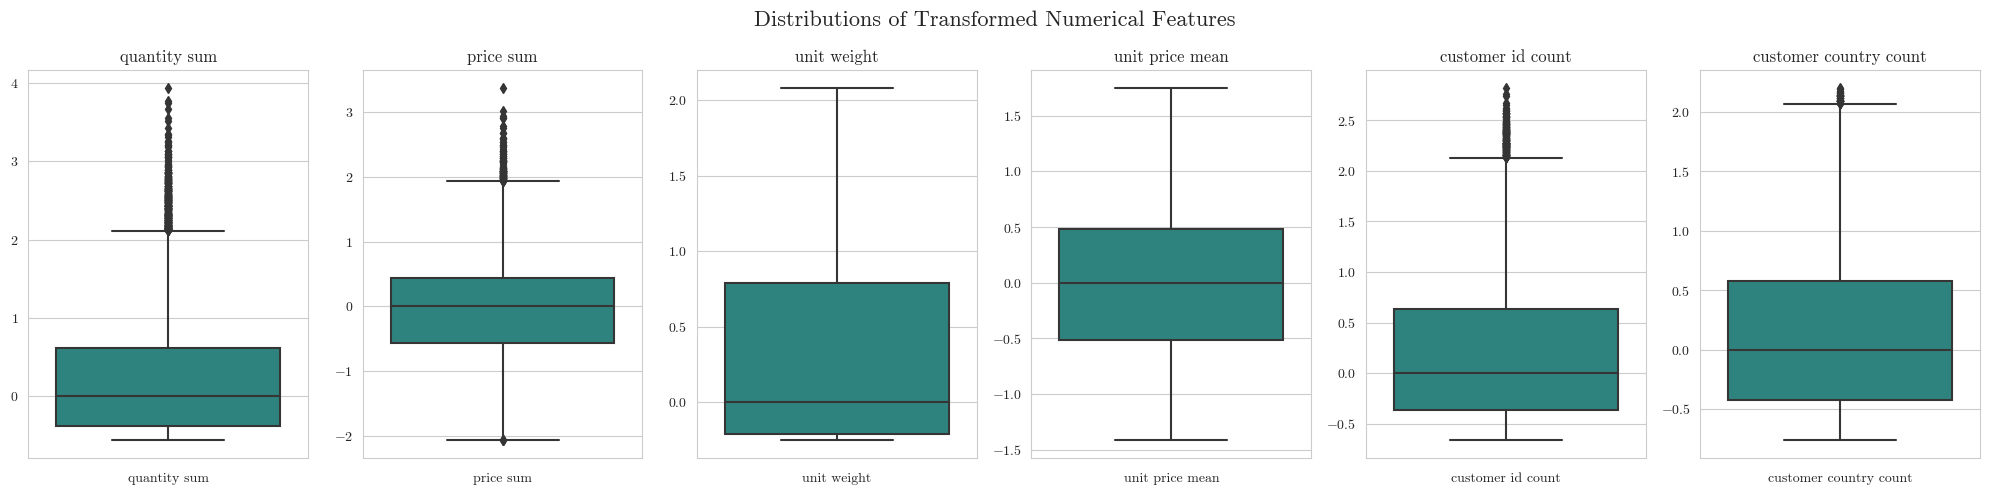

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_id_count', 'customer_country_count']

# Setting up the figure and axis
fig, axs = plt.subplots(1, len(features), figsize=(20, 5))

# Select a color from the viridis palette
viridis_color = plt.cm.viridis(0.5)

# Loop over each feature and plot a boxplot on its respective axis
for i, feature in enumerate(features):
    sns.boxplot(y=transformed_df_with_headers[feature], ax=axs[i], color=viridis_color)
    
    # Remove underscores and capitalize feature names for titles
    feature_title = feature.replace('_', ' ')
    axs[i].set_title(feature_title)
    axs[i].set_ylabel('')  # To avoid repeated y-labels
    axs[i].set_xlabel(feature_title)

# Add a main title to the subplots
fig.suptitle('Boxplots of Transformed Numerical Features', fontsize=16)

# Adjust subplot parameters to fit the main title
fig.subplots_adjust(top=0.92)

plt.tight_layout()

# Save the figure
# save_figure(fig, 'bertopic_labeled_transformed_multiple_boxplots_robust')

plt.show()


## Lazy Predict

In [7]:
# filter df_bertopic_labeled on category to exclude -1 and '-1'
df_bertopic_labeled_ = df_bertopic_labeled[df_bertopic_labeled['category'] != '-1']
df_bertopic_labeled_ = df_bertopic_labeled_[df_bertopic_labeled_['category'] != -1]

In [26]:
# Run LazyPredict
lazy_pipeline = LazyPredictPipeline(df_bertopic_labeled_, 'category', categorical_columns=cat_columns, numerical_columns=[],log_transform_columns=num_columns)
models_, predictions_ = lazy_pipeline.run()

 97%|█████████▋| 28/29 [00:01<00:00, 19.68it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 205, number of used features: 21
[LightGBM] [Info] Start training from score -0.535518
[LightGBM] [Info] Start training from score -1.297658
[LightGBM] [Info] Start training from score -1.955714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

100%|██████████| 29/29 [00:01<00:00, 15.54it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 18
[LightGBM] [Info] Start training from score -0.535518
[LightGBM] [Info] Start training from score -1.315677
[LightGBM] [Info] Start training from score -1.921813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [28]:
models_

# drop first row
models_.iloc[1:]

Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.73               0.45    None      0.66   
NearestCentroid                    0.67               0.43    None      0.66   
BaggingClassifier                  0.69               0.42    None      0.63   
LinearDiscriminantAnalysis         0.67               0.42    None      0.63   
ExtraTreeClassifier                0.65               0.42    None      0.62   
LinearSVC                          0.67               0.41    None      0.61   
BernoulliNB                        0.65               0.41    None      0.61   
SVC                                0.67               0.40    None      0.60   
RidgeClassifierCV                  0.67               0.40    None      0.59   
RidgeClassifier                    0.67               0.40    None      0.59   
CalibratedClassifierCV             0.67               0.40    None      0.60   
Perceptron                         0.65               0.40    None      0.61   
LogisticRegression                 0.65               0.40    None      0.59   
DecisionTreeClassifier             0.62               0.40    None      0.60   
KNeighborsClassifier               0.65               0.39    None      0.58   
ExtraTreesClassifier               0.65               0.39    None      0.60   
LabelSpreading                     0.63               0.39    None      0.59   
LabelPropagation                   0.63               0.39    None      0.59   
QuadraticDiscriminantAnalysis      0.63               0.38    None      0.56   
SGDClassifier                      0.63               0.38    None      0.59   
PassiveAggressiveClassifier        0.62               0.37    None      0.56   
GaussianNB                         0.48               0.26    None      0.42   
DummyClassifier                    0.52               0.25    None      0.35   

                               Time Taken  Cross_Val_Score  
Model                                                       
LGBMClassifier                       0.40             0.78  
NearestCentroid                      0.02             0.71  
BaggingClassifier                    0.02             0.75  
LinearDiscriminantAnalysis           0.27             0.74  
ExtraTreeClassifier                  0.00             0.62  
LinearSVC                            0.04             0.73  
BernoulliNB                          0.01             0.75  
SVC                                  0.03             0.80  
RidgeClassifierCV                    0.01             0.76  
RidgeClassifier                      0.01             0.76  
CalibratedClassifierCV               0.05             0.76  
Perceptron                           0.01             0.74  
LogisticRegression                   0.03             0.76  
DecisionTreeClassifier               0.00             0.65  
KNeighborsClassifier                 0.17             0.75  
ExtraTreesClassifier                 0.04             0.75  
LabelSpreading                       0.09             0.74  
LabelPropagation                     0.13             0.74  
QuadraticDiscriminantAnalysis        0.12             0.68  
SGDClassifier                        0.02             0.70  
PassiveAggressiveClassifier          0.02             0.65  
GaussianNB                           0.00             0.60  
DummyClassifier                      0.00             0.59

In [14]:
# Run LazyPredict
lazy_pipeline = LazyPredictPipeline(df_bertopic_labeled, 'category_bertopic', categorical_columns=cat_columns, numerical_columns=[],log_transform_columns=num_columns)
models, predictions = lazy_pipeline.run()

 90%|████████▉ | 26/29 [01:08<00:12,  4.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1439
[LightGBM] [Info] Number of data points in the train set: 13630, number of used features: 78
[LightGBM] [Info] Start training from score -1.909176
[LightGBM] [Info] Start training from score -2.141645
[LightGBM] [Info] Start training from score -0.332241
[LightGBM] [Info] Start training from score -5.648828
[LightGBM] [Info] Start training from score -4.305093


100%|██████████| 29/29 [01:10<00:00,  2.42s/it]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1347
[LightGBM] [Info] Number of data points in the train set: 10904, number of used features: 74
[LightGBM] [Info] Start training from score -1.909176
[LightGBM] [Info] Start training from score -2.141489
[LightGBM] [Info] Start training from score -0.332317
[LightGBM] [Info] Start training from score -5.659299
[LightGBM] [Info] Start training from score -4.299673
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1346
[LightGBM] [Info] Number of data points in the train set: 10904, number of used features: 74
[LightGBM] [Info] Start training from score -1.909176
[LightGBM] [Info] Start training from score -2.141489
[LightGBM] [Info] Start training from score 

In [15]:
len(models)

25

In [27]:
# can you sort by F1 score
models.sort_values(by=['F1 Score'], ascending=False)




Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.82               0.45    None      0.80   
BaggingClassifier                  0.80               0.42    None      0.79   
RandomForestClassifier             0.80               0.36    None      0.76   
DecisionTreeClassifier             0.74               0.40    None      0.74   
ExtraTreesClassifier               0.77               0.35    None      0.73   
LogisticRegression                 0.77               0.31    None      0.72   
SGDClassifier                      0.76               0.31    None      0.71   
CalibratedClassifierCV             0.77               0.30    None      0.71   
LinearSVC                          0.77               0.30    None      0.71   
LinearDiscriminantAnalysis         0.75               0.33    None      0.71   
SVC                                0.77               0.29    None      0.70   
AdaBoostClassifier                 0.73               0.32    None      0.70   
Perceptron                         0.71               0.30    None      0.68   
RidgeClassifier                    0.75               0.26    None      0.68   
RidgeClassifierCV                  0.75               0.26    None      0.68   
KNeighborsClassifier               0.70               0.29    None      0.67   
PassiveAggressiveClassifier        0.66               0.32    None      0.67   
BernoulliNB                        0.67               0.32    None      0.66   
ExtraTreeClassifier                0.65               0.33    None      0.65   
LabelSpreading                     0.63               0.33    None      0.64   
LabelPropagation                   0.63               0.33    None      0.64   
DummyClassifier                    0.72               0.20    None      0.60   
NearestCentroid                    0.49               0.34    None      0.56   
QuadraticDiscriminantAnalysis      0.06               0.22    None      0.07   
GaussianNB                         0.03               0.21    None      0.04   

                               Time Taken  Cross_Val_Score  
Model                                                       
LGBMClassifier                       2.17             0.81  
BaggingClassifier                    0.84             0.79  
RandomForestClassifier               1.33             0.79  
DecisionTreeClassifier               0.22             0.73  
ExtraTreesClassifier                 1.18             0.76  
LogisticRegression                   0.65             0.77  
SGDClassifier                        0.88             0.76  
CalibratedClassifierCV              20.56             0.76  
LinearSVC                           15.26             0.76  
LinearDiscriminantAnalysis           0.37             0.74  
SVC                                 12.40             0.77  
AdaBoostClassifier                   1.15             0.73  
Perceptron                           0.23             0.63  
RidgeClassifier                      0.36             0.75  
RidgeClassifierCV                    0.65             0.75  
KNeighborsClassifier                 0.49             0.71  
PassiveAggressiveClassifier          0.18             0.68  
BernoulliNB                          0.08             0.67  
ExtraTreeClassifier                  0.06             0.65  
LabelSpreading                       6.87             0.67  
LabelPropagation                     3.62             0.67  
DummyClassifier                      0.04             0.72  
NearestCentroid                      0.07             0.29  
QuadraticDiscriminantAnalysis        0.19             0.05  
GaussianNB                           0.06             0.03